<a href="https://colab.research.google.com/github/aiwithroy/The_Sparks_Foundation-internship_tasks/blob/master/Prediction_using_Supervised_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#GRIP: The Sparks Foundation
#Data Science and Business Analytics Internship

#Author: Manos Chandra Roy

### *Task 1: Prediction Using Supervised Machine Learning*

In this regression task, we predict the percentage of marks that a student is expected to score based upon the number of hours they studied. we use the data available at https://bit.ly/w-data The dataset contains two variable - Hours indicating the number of hours of a student studies and Scores indicating the percentage score he/she received by studying for the corresponding hours.

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#Loading the dataset
data = pd.read_csv("/content/student_scores.csv")



In [3]:
print('shape of the dataset is: ',data.shape)
data.head()

shape of the dataset is:  (25, 2)


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
#Checking missing value in the dataframe
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


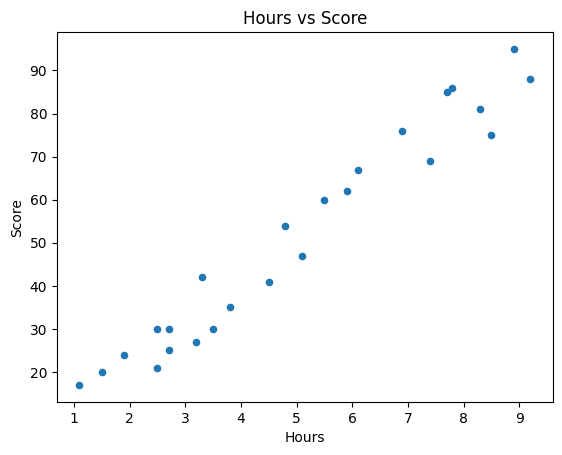

In [7]:
# Plotting the distribution of scores
data.plot(kind='scatter', x='Hours', y='Scores')
plt.title('Hours vs Score')
plt.xlabel('Hours')
plt.ylabel('Score')
plt.show()

In [8]:
data.corr(method= 'pearson')

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [9]:
data.corr(method= 'spearman')

,Hours,Scores
Hours,1.000000,0.971891
Scores,0.971891,1.000000


In [10]:
hours = data['Hours']
scores = data['Scores']

<ipython-input-11-a4006d7fac6c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(hours)


<Axes: xlabel='Hours', ylabel='Density'>

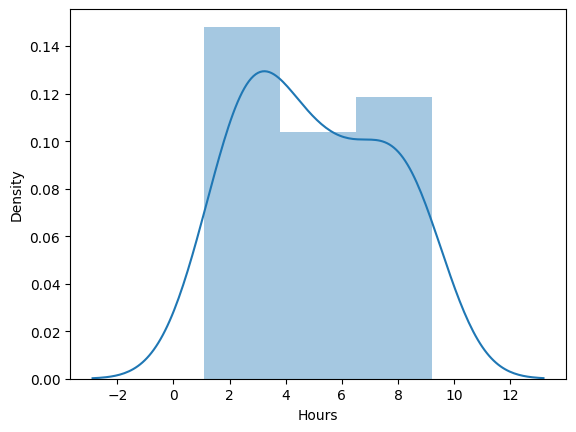

In [11]:
sns.distplot(hours)

## Linear Regression

In [12]:
x = data.iloc[:,:-1].values
y = data.iloc[:,1].values

In [13]:
#Splitting data into training and test sets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=50)

In [14]:
#Training the Algorithm
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
print("Training complete.")

Training complete.


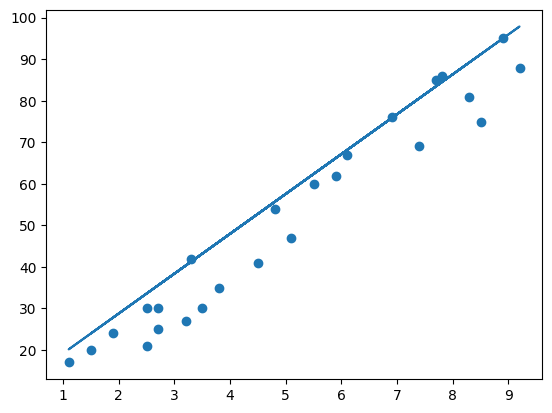

In [15]:
m=lr.coef_
c=lr.coef_
line = m*x+c
plt.scatter(x,y)
plt.plot(x,line)
plt.show()

In [16]:
#Making predictions
y_pred = lr.predict(x_test)
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,95,88.211394
1,30,28.718453
2,76,69.020122
3,35,39.273652
4,17,13.365436


## **What will be predicted score if a student studies for 9.25 hours/day?**

In [17]:
hrs = 9.25
scr = lr.predict([[hrs]])
print("If a student studies for {} hours per day he/she will score {}% in exams.".format(hrs,scr))


If a student studies for 9.25 hours per day he/she will score [91.56986604]% in exams.



# Model Evaluation

In [18]:
from sklearn import metrics
from sklearn.metrics import r2_score
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test,y_pred))
print("Mean Squared Error:",metrics.mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("R2 Score:",r2_score(y_test,y_pred))

Mean Absolute Error: 4.5916495300630285
Mean Squared Error: 25.584078296539932
Root Mean Squared Error: 5.058070610078504
R2 Score: 0.971014141329942
